In [1]:
import pandas as pd

In [3]:
df=pd.read_csv("airfoil_self_noise.dat",sep="\t",header=None)

In [4]:
df


,0,1,2,3,4,5
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


# Data Information

#### Data Set Information:

The NASA data set comprises different size NACA 0012 airfoils at various wind tunnel speeds and angles of attack. The span of the airfoil and the observer position were the same in all of the experiments.


Attribute Information:

This problem has the following inputs:
1. Frequency, in Hertzs.
2. Angle of attack, in degrees.
3. Chord length, in meters.
4. Free-stream velocity, in meters per second.
5. Suction side displacement thickness, in meters.

The only output is:
6. Scaled sound pressure level, in decibels

In [5]:
df.head()

,0,1,2,3,4,5
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [6]:

df.columns=["Frequency","AngleofAttack","ChordLen","Free_steam_velocity","Suction_displacemnt","Sound_pressure_level"]

In [7]:
df

,Frequency,AngleofAttack,ChordLen,Free_steam_velocity,Suction_displacemnt,Sound_pressure_level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


In [8]:
df.index

RangeIndex(start=0, stop=1503, step=1)

In [9]:
df.shape

(1503, 6)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Frequency             1503 non-null   int64  
 1   AngleofAttack         1503 non-null   float64
 2   ChordLen              1503 non-null   float64
 3   Free_steam_velocity   1503 non-null   float64
 4   Suction_displacemnt   1503 non-null   float64
 5   Sound_pressure_level  1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


## all the attributes are in datatype (int or Float) so not to worry we can move further 

In [11]:
df.isnull().sum()

Frequency               0
AngleofAttack           0
ChordLen                0
Free_steam_velocity     0
Suction_displacemnt     0
Sound_pressure_level    0
dtype: int64

## There is no null value as well so its pretty good now ,lets split the data into train test and carry on with correaltion

## Lets do Train Test Split

In [12]:
X=df.iloc[:,:-1]
X

,Frequency,AngleofAttack,ChordLen,Free_steam_velocity,Suction_displacemnt
0,800,0.0,0.3048,71.3,0.002663
1,1000,0.0,0.3048,71.3,0.002663
2,1250,0.0,0.3048,71.3,0.002663
3,1600,0.0,0.3048,71.3,0.002663
4,2000,0.0,0.3048,71.3,0.002663
...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849
1499,3150,15.6,0.1016,39.6,0.052849
1500,4000,15.6,0.1016,39.6,0.052849
1501,5000,15.6,0.1016,39.6,0.052849


In [13]:
y=df.iloc[:,-1]
y

0       126.201
1       125.201
2       125.951
3       127.591
4       127.461
         ...   
1498    110.264
1499    109.254
1500    106.604
1501    106.224
1502    104.204
Name: Sound_pressure_level, Length: 1503, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=2)

In [16]:
X_test.head()

,Frequency,AngleofAttack,ChordLen,Free_steam_velocity,Suction_displacemnt
719,2000,12.6,0.1524,39.6,0.058411
905,400,15.4,0.0508,39.6,0.028259
1279,8000,0.0,0.1016,39.6,0.001463
69,1600,1.5,0.3048,71.3,0.003367
272,400,2.0,0.2286,39.6,0.003466


In [17]:
X_train.head()

,Frequency,AngleofAttack,ChordLen,Free_steam_velocity,Suction_displacemnt
535,4000,2.7,0.1524,39.6,0.002948
557,800,5.4,0.1524,55.5,0.004333
1140,2500,12.7,0.0254,39.6,0.013025
787,1000,4.2,0.0508,39.6,0.001527
1496,1600,15.6,0.1016,39.6,0.052849


In [18]:
import seaborn as sns

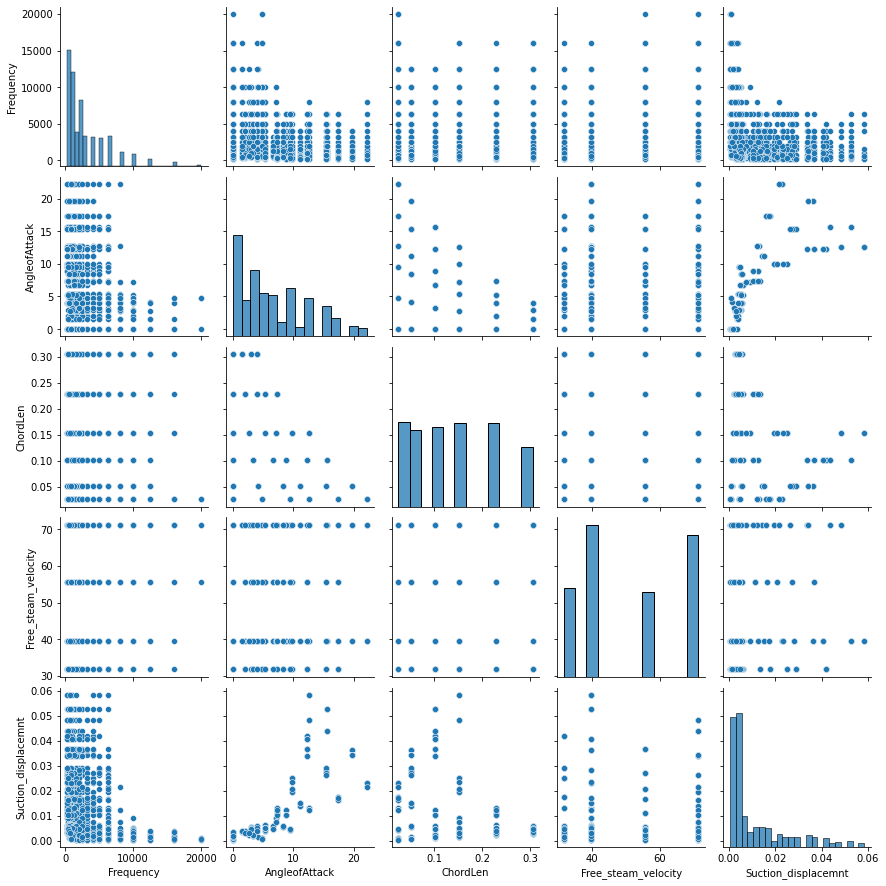

In [19]:
sns.pairplot(X_train)

In [20]:
import matplotlib.pyplot as plt
X_train.corr()

,Frequency,AngleofAttack,ChordLen,Free_steam_velocity,Suction_displacemnt
Frequency,1.000000,-0.285908,0.001796,0.118848,-0.236993
AngleofAttack,-0.285908,1.000000,-0.514265,0.066929,0.759773
ChordLen,0.001796,-0.514265,1.000000,-0.003043,-0.228574
Free_steam_velocity,0.118848,0.066929,-0.003043,1.000000,0.013465
Suction_displacemnt,-0.236993,0.759773,-0.228574,0.013465,1.000000


<AxesSubplot:>

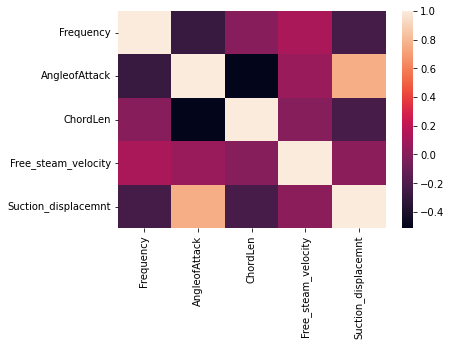

In [21]:
sns.heatmap(X_train.corr())

C:\ANACONDA3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Frequency'>

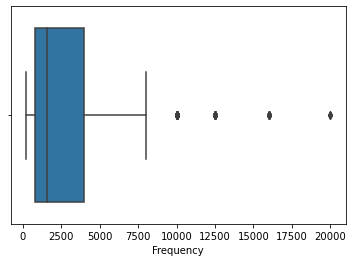

In [22]:
sns.boxplot(X_train["Frequency"])

C:\ANACONDA3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Frequency', ylabel='Sound_pressure_level'>

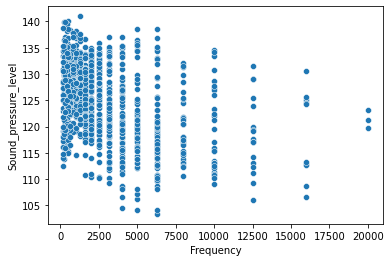

In [23]:
sns.scatterplot(X_train["Frequency"],y_train)

C:\ANACONDA3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AngleofAttack'>

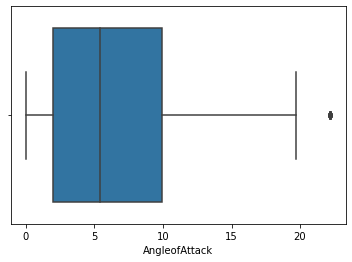

In [24]:
sns.boxplot(X_train["AngleofAttack"])

In [25]:
df["Sound_pressure_level"].unique()

array([126.201, 125.201, 125.951, ..., 106.604, 106.224, 104.204])

In [26]:
len(df["Sound_pressure_level"].unique())

1456

C:\ANACONDA3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sound_pressure_level'>

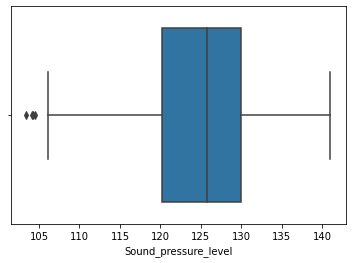

In [27]:
sns.boxplot(df["Sound_pressure_level"])

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error ,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score,r2_score
from sklearn.linear_model import LinearRegression ,ARDRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [31]:
LR = LinearRegression()
DTR = DecisionTreeRegressor()
RFR = RandomForestRegressor()
KNR = KNeighborsRegressor()

In [32]:
d={}
l=LR.fit(X_train,y_train)
ypred = LR.predict(X_test)
print(LR,":",r2_score(y_test,ypred)*100)
d.update({str(LR):LR.score(X_test,y_test)*100})

LinearRegression() : 53.43918487913797


In [33]:
li = [LR,DTR,RFR,KNR]
d = {}
for i in li:
    i.fit(X_train,y_train)
    ypred = i.predict(X_test)
    print(i,":",r2_score(y_test,ypred)*100)
    d.update({str(i):i.score(X_test,y_test)*100})

LinearRegression() : 53.43918487913797
DecisionTreeRegressor() : 86.88690938454442
RandomForestRegressor() : 92.25076431775065
KNeighborsRegressor() : 20.279928311888472


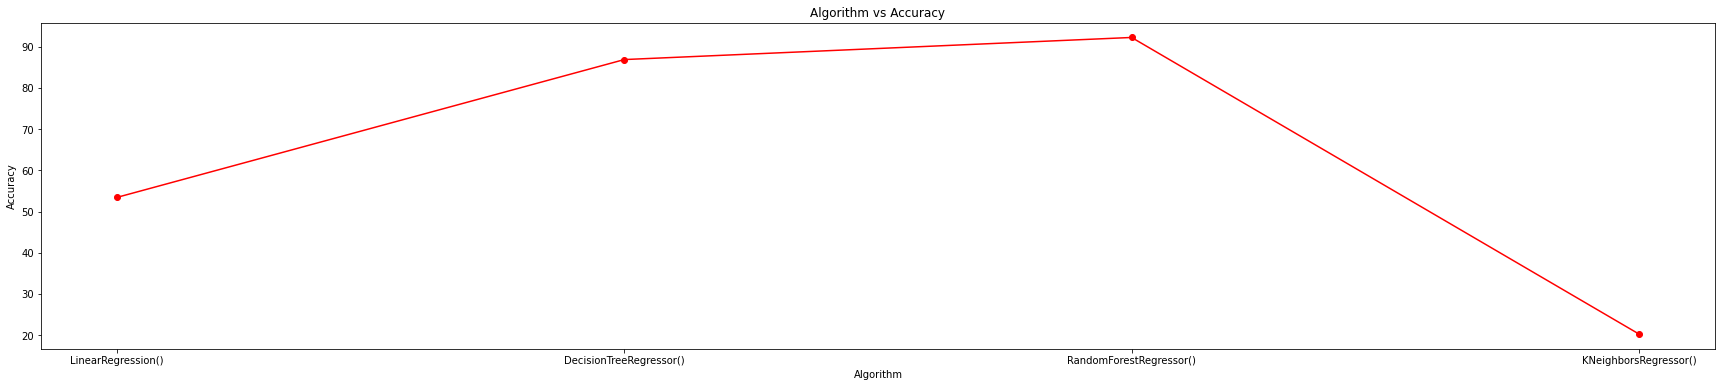

In [34]:
plt.figure(figsize=(30, 6))
plt.title("Algorithm vs Accuracy")
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.plot(d.keys(),d.values(),marker='o',color='red')
plt.show()

# LinearRegression() : 53.43918487913797


# DecisionTreeRegressor() : 85.9270061168454


# RandomForestRegressor() : 92.5704014794084


# KNeighborsRegressor() : 20.279928311888472


In [35]:
import pickle
pickle.dump(l,open("model.pkl","wb"))


In [36]:
pm=pickle.load(open('model.pkl','rb'))
pm.predict(X_test)

array([115.08461614, 123.81418653, 122.52975722, 126.23076004,
       126.90599498, 128.0339243 , 122.53379394, 132.9757874 ,
       129.82916079, 131.31083576, 132.28098868, 115.26537816,
       128.51666814, 132.59306504, 117.80558588, 132.39352023,
       130.8717886 , 121.18185859, 120.06856451, 121.44460404,
       120.53177906, 128.69652207, 127.68930596, 131.63669636,
       124.64977136, 121.81845419, 128.02402458, 117.34525267,
       124.70190539, 122.3812931 , 119.26408245, 128.47747678,
       126.77565074, 123.91542837, 110.73067899, 127.94669308,
       121.78426811, 130.59289977, 115.57769411, 120.71206467,
       124.57000025, 120.67938717, 129.52298334, 124.86888478,
       124.16876593, 121.27373742, 119.1773833 , 115.50860186,
       130.35806153, 125.81698671, 128.4204449 , 122.27191981,
       122.49851144, 129.63323765, 124.93418873, 120.51333121,
       126.25221796, 120.91015992, 130.92873485, 126.7344402 ,
       123.53660409, 128.58108087, 127.40752168, 123.79

In [37]:
X

,Frequency,AngleofAttack,ChordLen,Free_steam_velocity,Suction_displacemnt
0,800,0.0,0.3048,71.3,0.002663
1,1000,0.0,0.3048,71.3,0.002663
2,1250,0.0,0.3048,71.3,0.002663
3,1600,0.0,0.3048,71.3,0.002663
4,2000,0.0,0.3048,71.3,0.002663
...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849
1499,3150,15.6,0.1016,39.6,0.052849
1500,4000,15.6,0.1016,39.6,0.052849
1501,5000,15.6,0.1016,39.6,0.052849
